amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
training_set_labels = pd.read_csv('data/Training Set Labels.csv')
training_set_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
training_set_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [5]:
training_set_values = pd.read_csv('data/Training Set Values.csv')
training_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
training_set_values_labels = training_set_values.merge(training_set_labels, on='id')

In [8]:
training_set_values_labels.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
training_set_values_labels['recorded_year'] = training_set_values_labels['date_recorded'].str[:4].astype(int)

In [10]:
training_set_values_labels['permit'] = training_set_values_labels['permit'].astype(str)

In [11]:
# Drop name of water pump and name of who recorded the data, almost all of num_private is 0 (don't have description)
# Drop waterpoint_type_group since waterpoint_type is the same but with more specification
# scheme_name has same description as scheme_management
# Drop date_recorded and contruction year since we have age column
# Drop extraction_type_class and extraction_type_group 
# Drop source_type
# Drop region, subvillage, lga, ward, keeping lat, long, region_code, and district_code for location
# Drop payment_type, same as payment
# Drop quantity_group, same as quantity
# Drop management_group, management is more specific

#'construction_year',
training_set_values_labels.drop(['id', 'wpt_name', 'recorded_by', 'num_private', 'waterpoint_type_group', 'scheme_name',
                                 'date_recorded', 'extraction_type_class', 'extraction_type_group',
                                 'source_type', 'region', 'subvillage', 'lga', 'ward', 'payment_type', 'quantity_group',
                                 'management_group', 'public_meeting','funder','installer'
                                ], axis=1, inplace=True)

In [12]:
training_set_values_labels.isna().sum()

amount_tsh              0
gps_height              0
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
population              0
scheme_management    3877
permit                  0
construction_year       0
extraction_type         0
management              0
payment                 0
water_quality           0
quality_group           0
quantity                0
source                  0
source_class            0
waterpoint_type         0
status_group            0
recorded_year           0
dtype: int64

In [13]:
training_set_values_labels.fillna('Unknown', inplace=True)

In [14]:
training_set_values_labels.isna().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
basin                0
region_code          0
district_code        0
population           0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment              0
water_quality        0
quality_group        0
quantity             0
source               0
source_class         0
waterpoint_type      0
status_group         0
recorded_year        0
dtype: int64

In [70]:
training_set_values_labels['status_group']=='functional needs repair'

0        False
1        False
2        False
3        False
4        False
         ...  
59395    False
59396    False
59397    False
59398    False
59399    False
Name: status_group, Length: 59400, dtype: bool

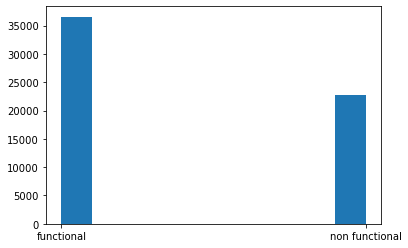

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

functional = training_set_values_labels[(training_set_values_labels['status_group']=='functional') | (training_set_values_labels['status_group']=='functional needs repair')]
non_functional = training_set_values_labels[training_set_values_labels['status_group']=='non functional']
binary_data = training_set_values_labels.copy()
binary_data['status_group'] = binary_data['status_group'].map({'functional' : 'functional', 'non functional' : 'non functional', 'functional needs repair' : 'functional'})
# training_set_values_labels['status_group'].hist()
plt.hist(binary_data['status_group']);


## Split data

In [15]:
from sklearn.model_selection import train_test_split

X = training_set_values_labels.drop('status_group', axis=1)
y = training_set_values_labels['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [16]:
y_train = y_train.map({'functional' : 0, 'non functional' : 1, 'functional needs repair' : 0})

In [17]:
median_year_with_no_zero = X_train[X_train['construction_year'] > 0]['construction_year'].median()
X_train.loc[(X_train['construction_year'] == 0),'construction_year'] = median_year_with_no_zero
X_train.loc[(X_train['construction_year'] > X_train['recorded_year']),'construction_year'] = median_year_with_no_zero
X_train['age'] = X_train['recorded_year'] - X_train['construction_year']

C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-17-9f7a160aa887>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

## DummyClassifier

In [18]:
y_train.value_counts(normalize=True)

0    0.615758
1    0.384242
Name: status_group, dtype: float64

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

dummy_model = DummyClassifier(strategy="most_frequent")

cv_results = cross_validate(dummy_model, X_train, y_train, return_train_score=True)

In [20]:
print('Mean Train Score: {}'.format(cv_results['train_score'].mean()))
print('Mean Test Score: {}'.format(cv_results['test_score'].mean()))

Mean Train Score: 0.6157575757575758
Mean Test Score: 0.6157575757575758


## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

categorical_cols = X_train.select_dtypes('object')
numerical_cols = X_train.select_dtypes(exclude=['object'])

categorical_pipeline = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))])

numerical_pipeline = Pipeline(steps=[('ss', StandardScaler())])

trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, numerical_cols.columns),
    ('categorical', categorical_pipeline, categorical_cols.columns)
])

In [22]:
lr_pipline = Pipeline(steps=[('trans', trans),
                              ('model', LogisticRegression(random_state=42))])

lr_grid = {'model__C' : [0.5, 1, 50],
       'model__max_iter' : [1750, 2000],
       'model__class_weight': [None, 'balanced', 0.25],
       'model__tol' : [0.0001, 0.01, 0.1]}

lr_gs = GridSearchCV(lr_pipline, lr_grid, cv=3, return_train_score=True)

In [23]:
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'construction_year', 'recorded_year',
       'age'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder...
                                                                         Index(['bas

In [24]:
lr_gs.best_params_

{'model__C': 1,
 'model__class_weight': None,
 'model__max_iter': 1750,
 'model__tol': 0.0001}

In [25]:
print('Mean Train Score: {}'.format(lr_gs.cv_results_['mean_train_score'].mean()))
print('Mean Test Score: {}'.format(lr_gs.cv_results_['mean_test_score'].mean()))

Mean Train Score: 0.7931974061603692
Mean Test Score: 0.7913729891507667


In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr_y_pred = cross_val_predict(lr_gs.best_estimator_, X_train, y_train)

confusion_matrix(y_train, lr_y_pred)

array([[25195,  2237],
       [ 6876, 10242]], dtype=int64)

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipline = Pipeline(steps=[('trans', trans),
                              ('model', KNeighborsClassifier())])

In [55]:
knn_grid= {'model__n_neighbors': [7,11,15,21],
      'model__weights': ['distance', 'uniform'],
      }

knn_gs = GridSearchCV(knn_pipline, knn_grid, cv=3, return_train_score=True)

knn_gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'construction_year', 'recorded_year',
       'age'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder...'ignore'))]),
                                                                       

In [56]:
knn_gs.best_params_

{'model__n_neighbors': 21, 'model__weights': 'distance'}

In [57]:
print('Mean Train Score: {}'.format(knn_gs.cv_results_['mean_train_score'].mean()))
print('Mean Test Score: {}'.format(knn_gs.cv_results_['mean_test_score'].mean()))

Mean Train Score: 0.9176038159371492
Mean Test Score: 0.8157603815937149


In [58]:
knn_y_pred = cross_val_predict(knn_gs.best_estimator_, X_train, y_train)

confusion_matrix(y_train, knn_y_pred)

array([[24620,  2812],
       [ 4720, 12398]], dtype=int64)

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

tree_trans = ColumnTransformer(transformers=[('categorical', categorical_pipeline, categorical_cols.columns)],
                              remainder='passthrough')

tree_pipline = Pipeline(steps=[('tree_trans', tree_trans),
                              ('model', DecisionTreeClassifier(random_state=42))])

In [60]:
tree_grid= {'model__criterion':['gini', 'entropy'],
         'model__max_depth':[None,1,3,5,10],
         'model__min_samples_split':[2,5],
         'model__min_samples_leaf':[1,3,5]}

tree_gs = GridSearchCV(tree_pipline, tree_grid, cv=3, return_train_score=True)

tree_gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tree_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'mode

In [61]:
tree_gs.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': None,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 2}

In [62]:
print('Mean Train Score: {}'.format(tree_gs.cv_results_['mean_train_score'].mean()))
print('Mean Test Score: {}'.format(tree_gs.cv_results_['mean_test_score'].mean()))

Mean Train Score: 0.802430228208006
Mean Test Score: 0.770220351664796


In [63]:
tree_y_pred = cross_val_predict(tree_gs.best_estimator_, X_train, y_train)

confusion_matrix(y_train, tree_y_pred)

array([[23575,  3857],
       [ 4508, 12610]], dtype=int64)

## Radom Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest_pipline = Pipeline(steps=[('tree_trans', tree_trans),
                              ('model', RandomForestClassifier(random_state=42))])

In [51]:
forest_grid = {'model__n_estimators':[10,100],
         'model__criterion':['gini', 'entropy'],
         'model__max_depth':[None,1,3,5,10],
         'model__min_samples_split':[2,5,6],
         'model__min_samples_leaf':[1,3,5]}

forest_gs = GridSearchCV(forest_pipline, forest_grid, cv=3, return_train_score=True)

forest_gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tree_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'mode

In [52]:
print('Mean Train Score: {}'.format(forest_gs.cv_results_['mean_train_score'].mean()))
print('Mean Test Score: {}'.format(forest_gs.cv_results_['mean_test_score'].mean()))

Mean Train Score: 0.779107369996259
Mean Test Score: 0.7627875046763934


In [53]:
forest_gs.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 6,
 'model__n_estimators': 100}

In [54]:
forest_y_pred = cross_val_predict(forest_gs.best_estimator_, X_train, y_train)

confusion_matrix(y_train, forest_y_pred)

array([[25139,  2293],
       [ 4177, 12941]], dtype=int64)

## XGBoost

In [29]:
from xgboost import XGBClassifier

In [33]:
xgb_pipeline = Pipeline(steps=[('tree_trans', tree_trans),
                               ('model', XGBClassifier(random_state=42))])

In [34]:
xgb_grid = {'model__n_estimators':[220,225,240,250,275],
            'model__max_depth':[4,5,6,7]}

In [35]:
xgb_gs = GridSearchCV(estimator=xgb_pipeline, param_grid=xgb_grid, cv=3, return_train_score=True)

In [36]:
xgb_gs.fit(X_train, y_train)

C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tree_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['basin', 'scheme_management', 'permit', 'extraction_type', 'management',
       'payment', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_class', 'wat...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                           

In [37]:
xgb_gs.best_params_

{'model__max_depth': 6, 'model__n_estimators': 275}

In [38]:
print('Mean Train Score: {}'.format(xgb_gs.cv_results_['mean_train_score'].mean()))
print('Mean Test Score: {}'.format(xgb_gs.cv_results_['mean_test_score'].mean()))

Mean Train Score: 0.9055393440578625
Mean Test Score: 0.8425364758698093


In [39]:
xgb_y_pred = cross_val_predict(xgb_gs.best_estimator_, X_train, y_train)

confusion_matrix(y_train, xgb_y_pred)

C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[25152,  2280],
       [ 4523, 12595]], dtype=int64)

## Best Model - XGBoost

In [40]:
best_model = xgb_gs.best_estimator_.fit(X_train, y_train)

C:\Users\soohy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:03:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
ohe_col_names = list(best_model.named_steps['tree_trans'].transformers_[0][1][0].get_feature_names(categorical_cols.columns))

In [42]:
col_names = ohe_col_names + list(numerical_cols.columns)

In [43]:
col_names

['basin_Internal',
 'basin_Lake Nyasa',
 'basin_Lake Rukwa',
 'basin_Lake Tanganyika',
 'basin_Lake Victoria',
 'basin_Pangani',
 'basin_Rufiji',
 'basin_Ruvuma / Southern Coast',
 'basin_Wami / Ruvu',
 'scheme_management_Company',
 'scheme_management_None',
 'scheme_management_Other',
 'scheme_management_Parastatal',
 'scheme_management_Private operator',
 'scheme_management_SWC',
 'scheme_management_Trust',
 'scheme_management_Unknown',
 'scheme_management_VWC',
 'scheme_management_WUA',
 'scheme_management_WUG',
 'scheme_management_Water Board',
 'scheme_management_Water authority',
 'permit_False',
 'permit_True',
 'permit_nan',
 'extraction_type_afridev',
 'extraction_type_cemo',
 'extraction_type_climax',
 'extraction_type_gravity',
 'extraction_type_india mark ii',
 'extraction_type_india mark iii',
 'extraction_type_ksb',
 'extraction_type_mono',
 'extraction_type_nira/tanira',
 'extraction_type_other',
 'extraction_type_other - mkulima/shinyanga',
 'extraction_type_other - pla

In [44]:
feature_importance_df = pd.DataFrame({'Features' : col_names, 'Importances' : best_model[1].feature_importances_})
feature_importance_df

,Features,Importances
0,basin_Internal,0.004417
1,basin_Lake Nyasa,0.028296
2,basin_Lake Rukwa,0.012110
3,basin_Lake Tanganyika,0.003264
4,basin_Lake Victoria,0.006435
...,...,...
106,district_code,0.004941
107,population,0.003475
108,construction_year,0.005221
109,recorded_year,0.005562


In [45]:
feature_importance_df[feature_importance_df['Importances'] > 0.02]

,Features,Importances
1,basin_Lake Nyasa,0.028296
31,extraction_type_ksb,0.028196
34,extraction_type_other,0.038131
43,management_company,0.033933
76,quantity_dry,0.256473
100,waterpoint_type_other,0.079307


In [46]:
y_test = y_test.map({'functional' : 0, 'non functional' : 1, 'functional needs repair' : 0})
median_year_with_no_zero = X_test[X_test['construction_year'] > 0]['construction_year'].median()
X_test.loc[(X_test['construction_year'] == 0),'construction_year'] = median_year_with_no_zero
X_test.loc[(X_test['construction_year'] > X_test['recorded_year']),'construction_year'] = median_year_with_no_zero
X_test['age'] = X_test['recorded_year'] - X_test['construction_year']

C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-46-3d37ebc82e3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

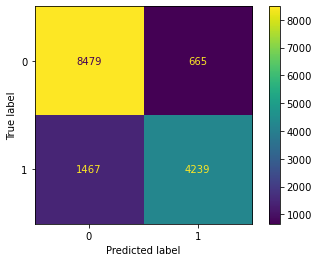

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_gs, X_test, y_test)

In [49]:
xgb_gs.score(X_test, y_test)

0.8564309764309764

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
    ('lr', gs),
    ('knn', knn_gs),
    ('rfc', forest_gs),
    ('xgb', xgb_gs)
], voting='soft')

In [ ]:

lr_accuracy = gs.cv_results_['mean_test_score'].mean()
knn_accuracy = knn_gs.cv_results_['mean_test_score'].mean()
rfc_accuracy = forest_gs.cv_results_['mean_test_score'].mean()
xgb_accuracy = xgb_gs.cv_results_['mean_test_score'].mean()

lr_weight = lr_accuracy / (lr_accuracy+knn_accuracy+rfc_accuracy+xgb_accuracy)
knn_weight = knn_accuracy / (lr_accuracy+knn_accuracy+rfc_accuracy+xgb_accuracy)
rfc_weight = rfc_accuracy / (lr_accuracy+knn_accuracy+rfc_accuracy+xgb_accuracy)
xgb_weight = xgb_accuracy / (lr_accuracy+knn_accuracy+rfc_accuracy+xgb_accuracy)

In [ ]:
display(lr_weight,knn_weight,rfc_weight,xgb_weight)

In [ ]:
vc_grid = {'weights' : [[1,1,1,1], [lr_weight,knn_weight,rfc_weight,xgb_weight]]}

In [ ]:
vc_gs = GridSearchCV(vc, vc_grid, cv=3, return_train_score=True)

In [ ]:
vc_gs.fit(X_train, y_train)

In [ ]:
print('Mean Train Score: {}'.format(vc_gs.cv_results_['mean_train_score'].mean()))
print('Mean Test Score: {}'.format(vc_gs.cv_results_['mean_test_score'].mean()))

In [ ]:
vc_gs.best_params_